# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [144]:
# Load Data
import tensorflow as tf
import pandas as pd
import numpy as np

cars_data = pd.read_csv('/content/drive/MyDrive/AI/CarPrice_Assignment.csv')
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [145]:
# Check Missing Values
np.where(pd.isnull(cars_data))

(array([], dtype=int64), array([], dtype=int64))

In [146]:
cars_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [147]:
if cars_data.duplicated(subset = ['car_ID']).sum() == 0:
    del cars_data['car_ID']

cars_data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [148]:
cars_data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [149]:
cars_df = pd.get_dummies(cars_data, columns=['CarName','symboling','fueltype',	'aspiration',	'doornumber',	'carbody',	'drivewheel',	'enginelocation',	'enginetype',	'cylindernumber',	'fuelsystem'], drop_first = True)
cars_df

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,...,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [150]:
# Split Data
np.random.seed(99999)
msk = np.random.rand(len(cars_df)) < 0.70
train_total = cars_df[msk]
test_total = cars_df[~msk]
print(len(train_total), len(test_total), sep = "\t")

145	60


In [151]:
train_total.head(10)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,...,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920.000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875.000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,17859.167,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
10,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,5800,23,29,16430.000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
11,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,5800,23,29,16925.000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
12,101.2,176.8,64.8,54.3,2710,164,3.31,3.19,9.0,121,4250,21,28,20970.000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [152]:
train_label = train_total.loc[:,'price']
test_label = test_total.loc[:,'price']
train_label

0      13495.0
3      13950.0
5      15250.0
6      17710.0
7      18920.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 145, dtype: float64

In [153]:
test_data= test_total.drop(columns = ['price'])
train_data= train_total.drop(columns = ['price'])
train_data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,CarName_dodge challenger se,...,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [154]:
{train_data.columns.get_loc(c): c for idx, c in enumerate(train_data.columns)}

{0: 'wheelbase',
 1: 'carlength',
 2: 'carwidth',
 3: 'carheight',
 4: 'curbweight',
 5: 'enginesize',
 6: 'boreratio',
 7: 'stroke',
 8: 'compressionratio',
 9: 'horsepower',
 10: 'peakrpm',
 11: 'citympg',
 12: 'highwaympg',
 13: 'CarName_alfa-romero Quadrifoglio',
 14: 'CarName_alfa-romero giulia',
 15: 'CarName_alfa-romero stelvio',
 16: 'CarName_audi 100 ls',
 17: 'CarName_audi 100ls',
 18: 'CarName_audi 4000',
 19: 'CarName_audi 5000',
 20: 'CarName_audi 5000s (diesel)',
 21: 'CarName_audi fox',
 22: 'CarName_bmw 320i',
 23: 'CarName_bmw x1',
 24: 'CarName_bmw x3',
 25: 'CarName_bmw x4',
 26: 'CarName_bmw x5',
 27: 'CarName_bmw z4',
 28: 'CarName_buick century',
 29: 'CarName_buick century luxus (sw)',
 30: 'CarName_buick century special',
 31: 'CarName_buick electra 225 custom',
 32: 'CarName_buick opel isuzu deluxe',
 33: 'CarName_buick regal sport coupe (turbo)',
 34: 'CarName_buick skyhawk',
 35: 'CarName_buick skylark',
 36: 'CarName_chevrolet impala',
 37: 'CarName_chevrole

In [155]:
mean = train_data.iloc[:,0:13].mean(axis=0) # taking the mean of 
train_data.iloc[:,0:13] -= mean
std = train_data.iloc[:,0:13].std(axis=0)
train_data.iloc[:,0:13] /= std
test_data.iloc[:,0:13] -= mean
test_data.iloc[:,0:13] /= std

mean

wheelbase             98.969655
carlength            174.761379
carwidth              66.094483
carheight             53.762069
curbweight          2585.062069
enginesize           128.406897
boreratio              3.347931
stroke                 3.247828
compressionratio       9.967034
horsepower           107.179310
peakrpm             5144.482759
citympg               24.703448
highwaympg            30.151724
dtype: float64

In [156]:
std

wheelbase             5.905757
carlength            12.067330
carwidth              2.204817
carheight             2.526335
curbweight          508.641644
enginesize           40.854841
boreratio             0.268677
stroke                0.305035
compressionratio      3.707553
horsepower           40.324150
peakrpm             485.309081
citympg               6.424913
highwaympg            6.587373
dtype: float64

In [157]:
mean_label = train_label.mean()
train_label -= mean_label
std_label = train_label.std()
train_label /= std_label
test_label -= mean_label
test_label /= std_label
print(mean_label, std_label, sep="\t")

13692.766668965516	7930.658009636823


In [158]:
test_label

1      0.353972
2      0.353972
4      0.473761
16     3.482969
18    -1.077056
25    -0.882747
27    -0.647458
33    -0.903300
34    -0.827645
35    -0.806713
39    -0.611269
43    -0.871021
44    -0.602254
48     2.756043
53    -0.882369
57    -0.006023
64    -0.308646
66     0.586488
67     1.495366
73     3.438206
76    -1.047046
77    -0.946172
83     0.148315
84     0.100399
86    -0.693986
88    -0.556545
89    -1.033176
91    -0.888169
94    -0.806209
97    -0.717944
101   -0.024433
103   -0.024433
108   -0.062134
112    0.404409
113    0.378560
114    0.426476
120   -0.941128
123   -0.601686
124   -0.117111
127    2.564129
133   -0.192010
141   -0.828023
143   -0.470676
144   -0.562345
145   -0.306881
151   -0.927384
152   -0.908470
156   -0.851728
157   -0.818944
160   -0.750854
161   -0.672676
162   -0.559193
171   -0.270314
181    0.259403
182   -0.746189
184   -0.718448
185   -0.693230
186   -0.655402
192    0.019196
193   -0.176879
Name: price, dtype: float64

In [159]:
test = np.array(test_data.iloc[:]).astype('float32')
train = np.array(train_data.iloc[:]).astype('float32')
test_l= np.array(test_label.astype('float32'))
train_l= np.array(train_label.astype('float32'))
train.shape

(145, 193)

In [160]:
# Model : Input Layer, 3 hidden layers & Output Layer
from keras import models
from keras import layers
def build_model(act):
  model = models.Sequential()
  model.add(layers.Dense(128, activation= act,input_shape=(train.shape[1],)))
  model.add(layers.Dense(64, activation= act))
  model.add(layers.Dense(32, activation= act))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

build_model('relu').summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               24832     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


In [161]:
build_model('tanh').summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               24832     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


In [164]:
from keras import regularizers
def build_model_regular(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001),input_shape=(train.shape[1],)))
  model.add(layers.Dense(8, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(layers.Dense(6, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

build_model_regular('tanh').summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                1940      
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 2,089
Trainable params: 2,089
Non-trainable params: 0
_________________________________________________________________


In [165]:
from keras import regularizers
def build_model_drop(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,input_shape=(train.shape[1],)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(8, activation= act))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(6, activation= act))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

build_model_drop('relu').summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                1940      
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 54        
_________________________________________________________________
dropout_5 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [168]:
# Train and validate
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_relu = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
  model = build_model('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_relu.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [169]:
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_tanh = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
  model = build_model('tanh')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_tanh.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [170]:
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_regular = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
  model = build_model_regular('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_regular.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [171]:
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_drop = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
  model = build_model_drop('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=1)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
  all_scores_drop.append(val_mae)

processing fold # 0
Epoch 1/100
109/109 [==============================] - 1s 1ms/step - loss: 0.9296 - mae: 0.6590
Epoch 2/100
109/109 [==============================] - 0s 1ms/step - loss: 0.5403 - mae: 0.5288
Epoch 3/100
109/109 [==============================] - 0s 1ms/step - loss: 0.8406 - mae: 0.6383
Epoch 4/100
109/109 [==============================] - 0s 1ms/step - loss: 0.3121 - mae: 0.3917
Epoch 5/100
109/109 [==============================] - 0s 1ms/step - loss: 0.4715 - mae: 0.4404
Epoch 6/100
109/109 [==============================] - 0s 1ms/step - loss: 0.4047 - mae: 0.4273
Epoch 7/100
109/109 [==============================] - 0s 1ms/step - loss: 0.3242 - mae: 0.3959
Epoch 8/100
109/109 [==============================] - 0s 1ms/step - loss: 0.2071 - mae: 0.3383
Epoch 9/100
109/109 [==============================] - 0s 1ms/step - loss: 0.4670 - mae: 0.4619
Epoch 10/100
109/109 [==============================] - 0s 1ms/step - loss: 0.5002 - mae: 0.4765
Epoch 11/100
109/10

In [172]:
# MAE
all_scores_relu

[0.3948672413825989,
 0.2968040108680725,
 0.3949221074581146,
 0.35319045186042786]

In [173]:
all_scores_tanh

[0.4228369891643524,
 0.31646913290023804,
 0.4728471338748932,
 0.36651742458343506]

In [174]:
all_scores_regular

[0.39555269479751587,
 0.28542542457580566,
 0.42505544424057007,
 0.38696447014808655]

In [175]:
all_scores_drop

[0.40885230898857117,
 0.5038523077964783,
 0.5056225657463074,
 0.33180248737335205]

In [176]:
# Evaluation of Test Data
model_tanh = build_model('tanh')
model_tanh.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_tanh.evaluate(test, test_l)

2/2 [==============================] - 0s 5ms/step - loss: 0.1183 - mae: 0.2342


In [177]:
model_relu = build_model('relu')
model_relu.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_relu.evaluate(test, test_l)

2/2 [==============================] - 0s 10ms/step - loss: 0.0981 - mae: 0.2204


In [178]:
model_regular = build_model_regular('relu')
model_regular.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_regular.evaluate(test, test_l)

2/2 [==============================] - 0s 4ms/step - loss: 0.1132 - mae: 0.2046


In [179]:
model_drop = build_model_drop('relu')
model_drop.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_drop.evaluate(test, test_l)

2/2 [==============================] - 0s 6ms/step - loss: 0.2499 - mae: 0.3343


In [180]:
# Prediction
test_l

array([ 0.35397232,  0.35397232,  0.4737606 ,  3.4829686 , -1.0770565 ,
       -0.8827473 , -0.64745784, -0.9033004 , -0.82764465, -0.8067132 ,
       -0.6112692 , -0.8710206 , -0.6022535 ,  2.756043  , -0.882369  ,
       -0.00602304, -0.3086461 ,  0.5864877 ,  1.4953656 ,  3.4382057 ,
       -1.0470464 , -0.946172  ,  0.14831471,  0.1003994 , -0.6939861 ,
       -0.55654484, -1.0331762 , -0.8881693 , -0.80620885, -0.7179438 ,
       -0.02443261, -0.02443261, -0.0621344 ,  0.4044095 ,  0.37856042,
        0.42647576, -0.9411283 , -0.6016861 , -0.11711092,  2.5641294 ,
       -0.19201013, -0.82802296, -0.47067553, -0.5623451 , -0.3068808 ,
       -0.92738414, -0.9084702 , -0.8517284 , -0.8189442 , -0.7508541 ,
       -0.67267644, -0.5591928 , -0.27031386,  0.2594026 , -0.7461886 ,
       -0.71844816, -0.69322956, -0.6554017 ,  0.01919555, -0.17687897],
      dtype=float32)

In [181]:
def predict(model, m):
  print(f" the Actual value Price was : {test_l[m]* std_label + mean_label} " )
  return(f" the predicted Price was : {(model.predict(test[m:m+1].reshape(1,test.shape[1]))) * std_label + mean_label} ")

In [182]:
x_tanh = predict(model_tanh,2)
x_tanh

 the Actual value Price was : 17450.00000453616 


' the predicted Price was : [[15113.157]] '

In [183]:
x_relu = predict(model_relu,2)
x_relu

 the Actual value Price was : 17450.00000453616 


' the predicted Price was : [[14942.084]] '

In [184]:
x_regular = predict(model_regular,2)
x_regular

 the Actual value Price was : 17450.00000453616 


' the predicted Price was : [[17376.188]] '

In [185]:
x_drop = predict(model_drop,2)
x_drop

 the Actual value Price was : 17450.00000453616 


' the predicted Price was : [[14972.882]] '

In [186]:
def plot_fn(mod):
  y_true = test_l* std_label + mean_label
  y_pred = mod.predict(test) * std_label + mean_label
  return y_true , y_pred.flatten()

In [187]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def plotting(mod, label):
  y_true, y_pred = plot_fn(mod)
  coef = np.polyfit(y_true,y_pred,1)
  poly1d_fn = np.poly1d(coef) 
  # poly1d_fn is now a function which takes in x and returns an estimate for y
  plt.figure()
  plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
  plt.title(label)
  plt.xlabel('Thousand Dollar True' )
  plt.ylabel('Thousand Dollar Predictions' )
  plt.xlim(0, 50000)
  plt.ylim(0, 50000)

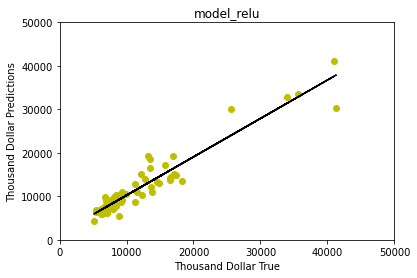

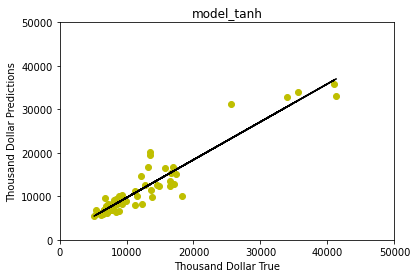

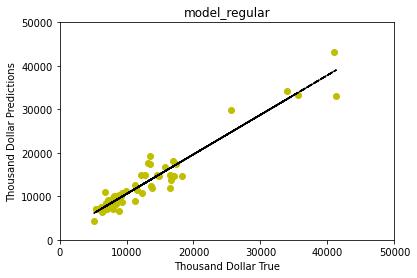

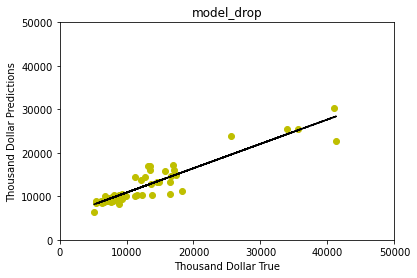

In [188]:
plot_list = []
for i,j in enumerate([model_relu, model_tanh, model_regular, model_drop]):
  list_name = ['model_relu', 'model_tanh', 'model_regular', 'model_drop']
  plot_list.append(plotting(j,list_name[i]))